In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 33.8 MB/s 
     |████████████████████████████████| 6.3 MB 55.1 MB/s 


In [ ]:
#Importacion de modulos importantes para la Investigacion
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df_co2_emissions = pd.read_csv('Data Emisiones de CO2.csv')
df_co2_emissions

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.00,0.015,0.00,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.00,0.099,0.00,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.00,0.191,0.00,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.00,0.282,0.00,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.00,0.388,0.00,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,0.03,726.480,0.05,0.579,0.633,0.219,8.035,0.504,NaN,NaN,3.631,NaN,0.036,0.582,NaN,NaN,0.263,NaN,9.35,0.04,0.05,NaN,NaN,0.03,NaN,17.478,577.422,NaN,NaN,131.580,NaN,0.05,0.08,NaN,NaN,0.02,NaN,67.49,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,0.03,737.295,0.05,0.516,0.581,0.228,7.061,0.581,NaN,NaN,3.173,NaN,0.041,0.503,NaN,NaN,0.226,NaN,12.54,0.04,0.05,NaN,NaN,0.03,NaN,18.059,584.482,NaN,NaN,134.753,NaN,0.05,0.08,NaN,NaN,0.02,NaN,65.98,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,0.03,747.542,0.05,0.467,0.536,NaN,6.383,0.581,NaN,NaN,3.283,NaN,0.041,0.448,NaN,NaN,0.231,NaN,14.90,0.04,0.04,NaN,NaN,0.03,NaN,18.640,590.865,NaN,NaN,138.036,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,0.03,758.882,0.05,0.499,0.564,NaN,7.369,0.581,NaN,NaN,3.390,NaN,0.040,0.510,NaN,NaN,0.235,NaN,13.01,0.04,0.05,NaN,NaN,0.03,NaN,19.222,598.234,NaN,NaN,141.426,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,

In [ ]:
keep_cols = ['iso_code', 'country', 'year', 'co2', 'population' ]
df_co2_emissions = df_co2_emissions[keep_cols]
df_co2_emissions

,iso_code,country,year,co2,population
0,AFG,Afghanistan,1949,0.015,7624058.0
1,AFG,Afghanistan,1950,0.084,7752117.0
2,AFG,Afghanistan,1951,0.092,7840151.0
3,AFG,Afghanistan,1952,0.092,7935996.0
4,AFG,Afghanistan,1953,0.106,8039684.0
...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13814642.0
24647,ZWE,Zimbabwe,2016,10.815,14030338.0
24648,ZWE,Zimbabwe,2017,10.247,14236599.0
24649,ZWE,Zimbabwe,2018,11.341,14438812.0


In [ ]:
df_co2_emissions.dtypes

iso_code       object
country        object
year            int64
co2           float64
population    float64
dtype: object

In [ ]:
filtro = df_co2_emissions['year'] == 2000
df_co2_emissions_2000 = df_co2_emissions[filtro]
df_co2_emissions_2000

,iso_code,country,year,co2,population
51,AFG,Afghanistan,2000,0.758,2.077996e+07
187,NaN,Africa,2000,888.145,8.109842e+08
274,ALB,Albania,2000,3.004,3.129246e+06
378,DZA,Algeria,2000,87.443,3.104224e+07
408,AND,Andorra,2000,0.524,6.539000e+04
...,...,...,...,...,...
24085,VNM,Vietnam,2000,52.332,7.991041e+07
24374,OWID_WRL,World,2000,25119.042,6.143494e+09
24444,YEM,Yemen,2000,14.474,1.740907e+07
24514,ZMB,Zambia,2000,1.785,1.041594e+07


In [ ]:
df_co2_emissions_2000['co2'].sum()

92678.839

In [ ]:
df_co2_emissions_2000['population'].sum()

18426999640.0

In [ ]:
filtro = df_co2_emissions['year'] == 2010
df_co2_emissions_2010 = df_co2_emissions[filtro]
df_co2_emissions_2010

,iso_code,country,year,co2,population
61,AFG,Afghanistan,2010,8.398,2.918551e+07
197,NaN,Africa,2010,1213.859,1.039304e+09
284,ALB,Albania,2010,4.448,2.948029e+06
388,DZA,Algeria,2010,117.814,3.597745e+07
418,AND,Andorra,2010,0.517,8.445400e+04
...,...,...,...,...,...
24114,NaN,Wallis and Futuna,2010,0.029,1.268600e+04
24384,OWID_WRL,World,2010,33131.911,6.956824e+09
24454,YEM,Yemen,2010,23.152,2.315485e+07
24524,ZMB,Zambia,2010,2.563,1.360599e+07


In [ ]:
df_co2_emissions_2010['co2'].sum()

117903.818

In [ ]:
filtro = df_co2_emissions['year'] == 2019
df_co2_emissions_2019 = df_co2_emissions[filtro]
df_co2_emissions_2019

,iso_code,country,year,co2,population
70,AFG,Afghanistan,2019,10.720,3.804176e+07
206,NaN,Africa,2019,1448.793,1.308064e+09
293,ALB,Albania,2019,5.579,2.880913e+06
397,DZA,Algeria,2019,171.707,4.305305e+07
427,AND,Andorra,2019,0.470,7.714600e+04
...,...,...,...,...,...
24123,NaN,Wallis and Futuna,2019,0.029,1.143600e+04
24393,OWID_WRL,World,2019,36441.388,7.713468e+09
24463,YEM,Yemen,2019,10.255,2.916192e+07
24533,ZMB,Zambia,2019,6.720,1.786103e+07


In [ ]:
df_co2_emissions_2019['co2'].sum()

127617.53800000002

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'iso_a3':'iso_code'}, inplace = True)
keep_cols = ['iso_code', 'geometry']
world = world[keep_cols]
world

,iso_code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
gdf_co2_emissions_2000 = pd.merge(world, df_co2_emissions_2000, on='iso_code')
gdf_co2_emissions_2000

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2000,0.834,811011.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2000,2.571,33499177.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2000,572.162,30588379.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2000,5998.070,281710914.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2000,148.756,14922724.0
...,...,...,...,...,...,...
163,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2000,11.996,2034823.0
164,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2000,44.950,9487612.0
165,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2000,1.521,613558.0
166,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2000,24.191,1267159.0


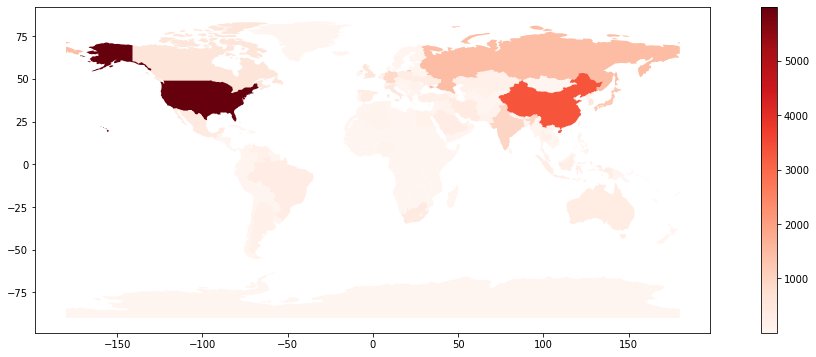

In [ ]:
gdf_co2_emissions_2000.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [ ]:
gdf_co2_emissions_2010 = pd.merge(world, df_co2_emissions_2010, on='iso_code')
gdf_co2_emissions_2010

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2010,1.201,859816.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2010,6.925,44346532.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2010,555.550,34147566.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2010,5698.056,309011469.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2010,250.897,16252273.0
...,...,...,...,...,...,...
164,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2010,8.500,2070737.0
165,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2010,45.696,8991258.0
166,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2010,2.422,624279.0
167,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2010,46.959,1328144.0


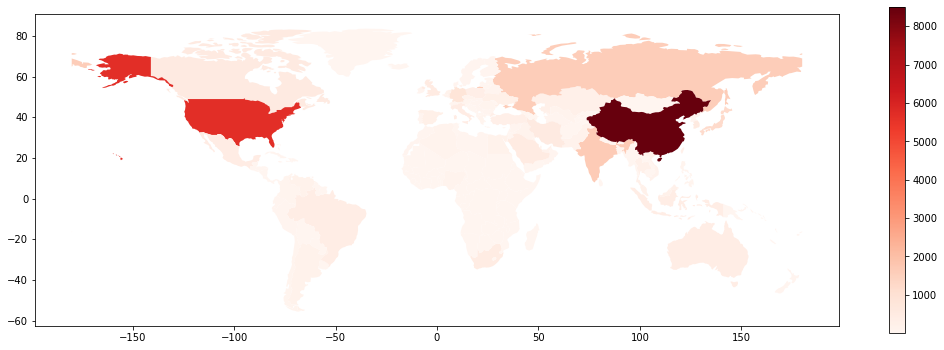

In [ ]:
gdf_co2_emissions_2010.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [ ]:
gdf_co2_emissions_2019 = pd.merge(world, df_co2_emissions_2019, on='iso_code')
gdf_co2_emissions_2019

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2019,2.257,889955.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2019,11.626,58005461.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2019,576.651,37411038.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2019,5284.697,329064917.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2019,313.798,18551428.0
...,...,...,...,...,...,...
164,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2019,8.041,2083458.0
165,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2019,54.667,8772228.0
166,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2019,2.461,627988.0
167,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2019,37.864,1394969.0


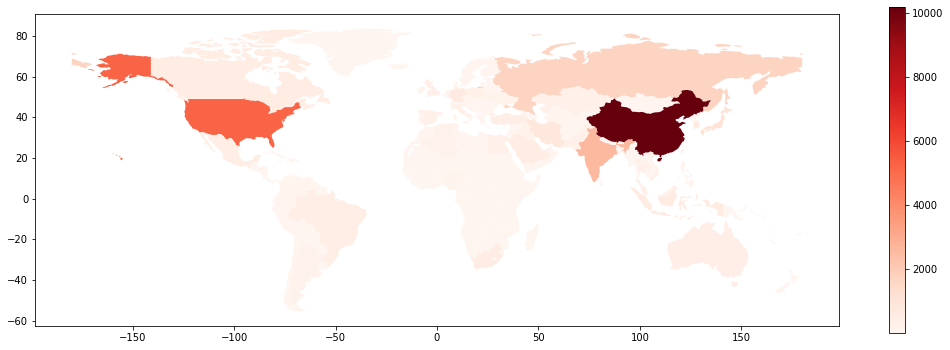

In [ ]:
gdf_co2_emissions_2019.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')